In [171]:
#   A Very Simple Neural Network in Python 
#   with Numpy for Activation Functions Testing
#   Abdel - 2022

import numpy as np
import matplotlib.pyplot as plt
import math, time


def next_batch(X, Y):
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i:i + batchSize], Y[i:i + batchSize])

def f(x): return np.sin(x)

Err = []

NN = range(0, 3000,20)

for i in NN:
  batchSize = 4

  #Epoch:
  #epochs = 1700
  #epochs = int(input('Epochs: '))
  epochs = int(i)

  #Activation Functions:
  
  #print('Choose between: sigmoid, tanh, ReLU')
  #activation = str(input('Funtion: '))
  #activation = 'sigmoid'
  activation = 'tanh'
  #activation = 'ReLU'

  #Learning Rates (entre 0 y 1):
  
  #LR = float(input('Learning rate: '))
  LR = 0.0048
  LR_sigmoid = LR
  LR_tanh = LR
  LR_ReLU = LR
  '''
  LR_sigmoid = 0.2
  LR_tanh = 0.005
  LR_ReLU = 0.0005
  '''


  #def f(x): return np.sin(x)
  
  minx, maxx = 0, 6.28
  miny, maxy = -1, 1
  numx = int(maxx * 3 + 1)  #Number of neuron
  inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 3, 1    #neuron
  
  funcs = {'sigmoid':  (lambda x: 1/(1 + np.exp(-x)),
                        lambda x: x * (1 - x),  (0,  1), LR_sigmoid),
              'tanh':  (lambda x: np.tanh(x),
                        lambda x: 1 - x**2,     (0, -1), LR_tanh),
              'ReLU':  (lambda x: x * (x > 0),
                        lambda x: x > 0,        (0, maxx), LR_ReLU),
          }
  (activate, activatePrime, (mina, maxa), L) = funcs[activation]
  
  X = x = np.linspace(minx, maxx, num=numx)
  X.shape = (numx, 1)
  Y = y = f(X)
  Y = (Y - miny)*(maxa - mina)/(maxy - miny) + mina   # normalise into activation

  # add a bias unit to the input layer
  X = np.concatenate((np.atleast_2d(np.ones(X.shape[0])).T, X), axis=1)

  # Random initial weights
  r0 = math.sqrt(2.0/(inputLayerSize))
  r1 = math.sqrt(2.0/(hiddenLayerSize))
  Wh = np.random.uniform(size=(inputLayerSize, hiddenLayerSize),low=-r0,high=r0)
  Wz = np.random.uniform(size=(hiddenLayerSize,outputLayerSize),low=-r1,high=r1)


  #def next_batch(X, Y):
  #    for i in np.arange(0, X.shape[0], batchSize):
  #        yield (X[i:i + batchSize], Y[i:i + batchSize])
  
  start = time.time()
  lossHistory = []
  
  for i in range(epochs):         # Training:
      epochLoss = []
  
      for (Xb, Yb) in next_batch(X, Y):
  
          H = activate(np.dot(Xb, Wh))            # hidden layer results
          Z = activate(np.dot(H,  Wz))            # output layer results
          E = Yb - Z                              # how much we missed (error)
          epochLoss.append(np.sum(E**2))
  
          dZ = E * activatePrime(Z)               # delta Z
          dH = dZ.dot(Wz.T) * activatePrime(H)    # delta H
          Wz += H.T.dot(dZ) * L                   # update output layer weights
          Wh += Xb.T.dot(dH) * L                  # update hidden layer weights
  
      mse = np.average(epochLoss)
      lossHistory.append(mse)
  
  X[:, 1] += maxx/(numx-1)/2
  H = activate(np.dot(X, Wh))
  Z = activate(np.dot(H, Wz))
  Z = ((miny - maxy) * Z - maxa * miny + maxy * mina)/(mina - maxa)
  Y = y
  
  end = time.time()
  Err.append(mse)

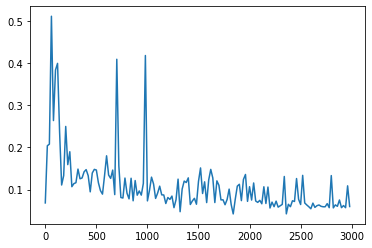

[0.14637900712450824, 0.11624539628298484, 0.09760785186111297, 0.08921981731420846, 0.1328853665075582, 0.1801135217866217, 0.13448495018496553, 0.1265399180022428, 0.14625767425613037, 0.08808612947661894, 0.40901089827336923, 0.15665722693704437, 0.08122702218561129, 0.08000477294815195, 0.1273648216595193, 0.09139933083629821, 0.0780032890124372, 0.12689043264902175, 0.07342918306097632, 0.12143899580713317, 0.08670323016767686, 0.09678375345404852, 0.0868779994353907, 0.11469574270467234, 0.41789961801438114]
150


In [172]:
plt.plot(NN, Err)
plt.show()
print(Err[25:50])
print(len(NN))

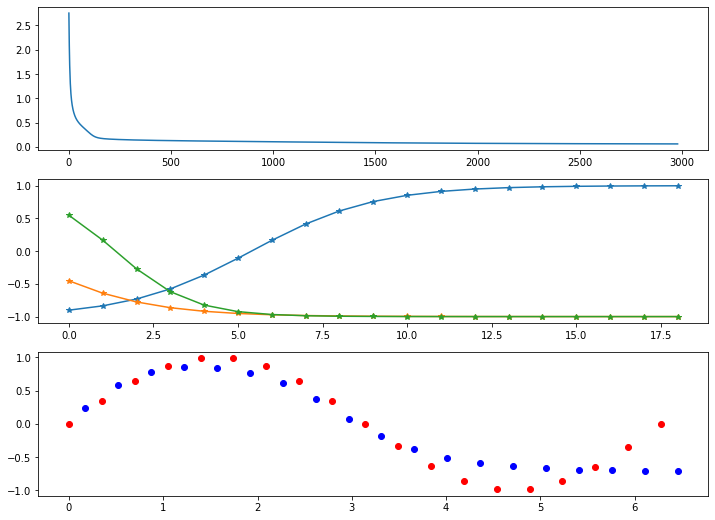

[ 2 3 1 ] Activation: tanh Iterations: 2980 Learning rate: 0.0048 Final loss: 0.05990350052847421 Time: 0.5746414661407471


In [173]:
plt.figure(figsize=(12, 9))
plt.subplot(311)
plt.plot(lossHistory)
plt.subplot(312)
plt.plot(H, '-*')
plt.subplot(313)
plt.plot(x, Y, 'ro')    # training data
plt.plot(X[:, 1], Z, 'bo')   # learned
plt.show()
 
print('[', inputLayerSize, hiddenLayerSize, outputLayerSize, ']',
      'Activation:', activation, 'Iterations:', epochs,
      'Learning rate:', L, 'Final loss:', mse, 'Time:', end - start)

**Gold Standard** (Manuel Velez): Sigmoide / Epoch = 1700 / a =  0.2 (20%)

Se obtuvo: 

Final Loss (error)= 0.04236678675563427

Tiempo = 0.5554773807525635 s

Tarea: Modificar los parámetros del aprendizaje (LR/ Epoch/AF) para hacer que la red neuronal aprenda lo mejor posible (disminuyendo la cantidad de error lo mas que se pueda) y lo más rapido posible.